In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [229]:
np.random.seed(42)
df = pd.read_csv("datos_accidentes_cerebrovasculares.csv")

In [230]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [231]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [232]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<Axes: >

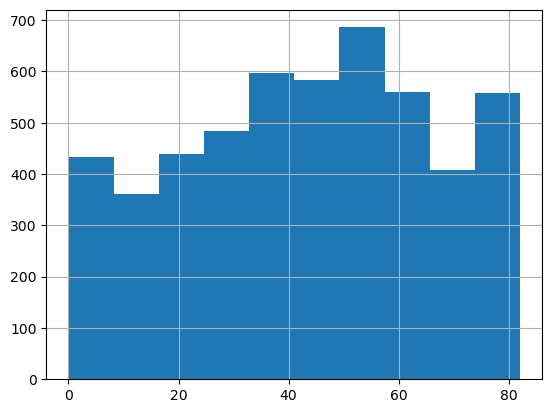

In [233]:
df.age.hist()

In [234]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [235]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [236]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<Axes: >

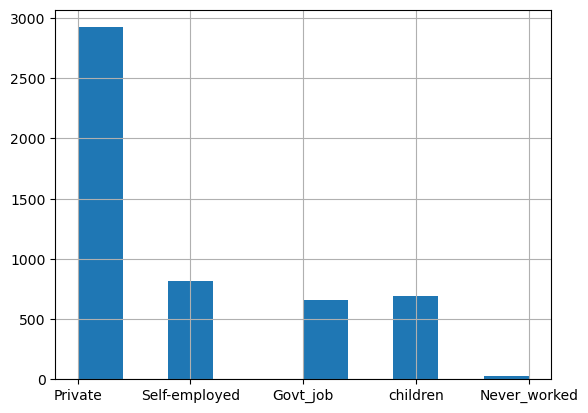

In [237]:
print(df.work_type.value_counts())
df.work_type.hist()

In [238]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [239]:
df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

<Axes: >

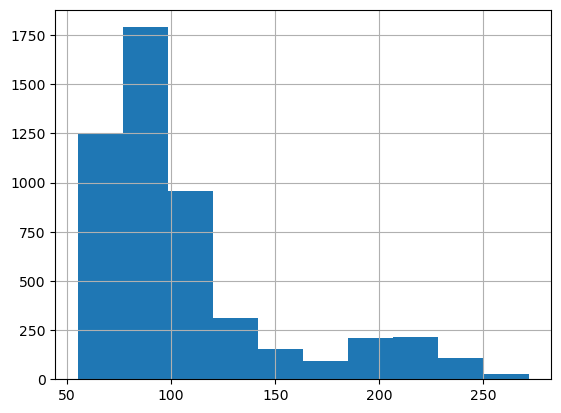

In [240]:
df.avg_glucose_level.hist()

In [241]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

<Axes: >

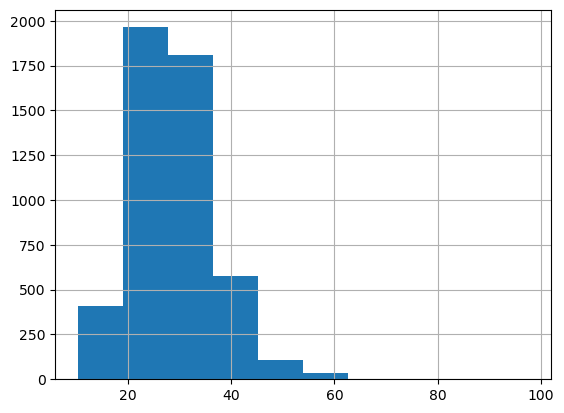

In [242]:
df.bmi.hist()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<Axes: >

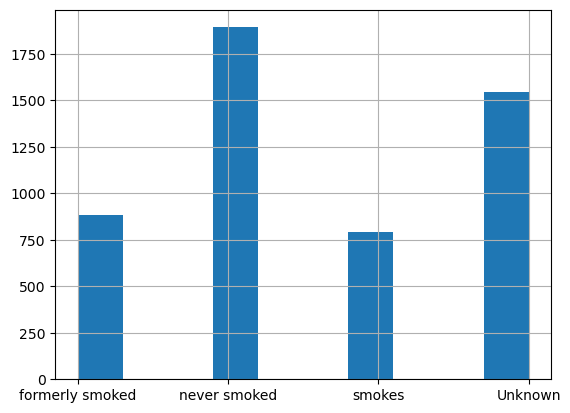

In [243]:
print(df.smoking_status.value_counts())
df.smoking_status.hist()

In [244]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [245]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [246]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [247]:
df.gender = df.gender.astype('category')
df.age = df.age.astype('int64')
df.hypertension = df.hypertension.astype('bool')
df.heart_disease = df.heart_disease.astype('bool')
df.work_type = df.work_type.astype('category')
df.Residence_type = df.Residence_type.astype('category')
df.avg_glucose_level = df.avg_glucose_level.astype('float64')
df.bmi = df.bmi.astype('float64')
df.smoking_status = df.smoking_status.astype('category')
df.stroke = df.stroke.astype('bool')

Eliminamos el id, ya que es una columna que obviamente no aporta ningun valor

In [248]:
df.drop('id', axis=1, inplace=True)

Ya que Residence_type solo tiene 2 clases, se transformará la variable a un booleano

In [249]:
df.Residence_type.replace('Urban', 1, inplace=True)
df.Residence_type.replace('Rural', 0, inplace=True)
df.Residence_type = df.Residence_type.astype('bool')

Lo mismo con ever_married

In [250]:
df.ever_married.replace('Yes', 1, inplace=True)
df.ever_married.replace('No', 0, inplace=True)
df.ever_married = df.ever_married.astype('bool')
df.ever_married

0       True
1       True
2       True
3       True
4       True
        ... 
5105    True
5106    True
5107    True
5108    True
5109    True
Name: ever_married, Length: 5110, dtype: bool

In [251]:
df.ever_married.value_counts()

True     3353
False    1757
Name: ever_married, dtype: int64

In [252]:
df.dtypes

gender               category
age                     int64
hypertension             bool
heart_disease            bool
ever_married             bool
work_type            category
Residence_type           bool
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object

In [253]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [254]:
df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['stroke']
)

In [255]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [256]:
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(df['bmi'].values.reshape(-1,1))
df_train.bmi = imputer.transform(df_train['bmi'].values.reshape(-1,1))
df_test.bmi = imputer.transform(df_test['bmi'].values.reshape(-1,1))

In [257]:
df_test.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

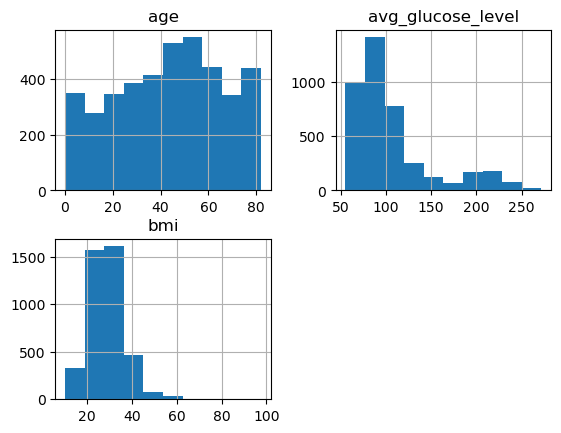

In [258]:
df_train.hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

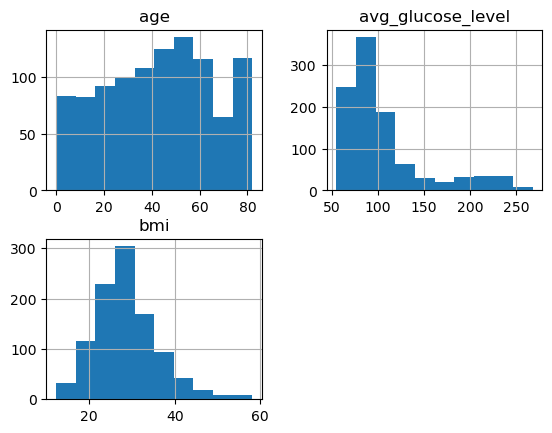

In [259]:
df_test.hist()

In [260]:
df_train.dtypes

gender               category
age                     int64
hypertension             bool
heart_disease            bool
ever_married             bool
work_type            category
Residence_type           bool
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object

In [261]:
categoricas = df.select_dtypes(include='category').columns

onehotencoded_train = []
onehotencoded_test = []
for i in categoricas:
    encoder = OneHotEncoder()
    col_encoded_train = encoder.fit_transform(df_train[i].values.reshape(-1,1)).toarray()
    col_encoded_test = encoder.transform(df_test[i].values.reshape(-1,1)).toarray()
    col_df_train = pd.DataFrame(col_encoded_train, columns=encoder.categories_[0])
    col_df_test = pd.DataFrame(col_encoded_test, columns=encoder.categories_[0])
    col_df_train = col_df_train.astype('bool')
    col_df_test = col_df_test.astype('bool')
    onehotencoded_train.append(col_df_train)
    onehotencoded_test.append(col_df_test)
    
transformed_df_train = df_train.copy()
transformed_df_test = df_test.copy()
categories_train = pd.concat(onehotencoded_train, axis=1)
categories_test = pd.concat(onehotencoded_test, axis=1)
transformed_df_train = pd.concat([transformed_df_train, categories_train], axis=1)
transformed_df_test = pd.concat([transformed_df_test, categories_test], axis=1)
transformed_df_train.drop(['gender', 'work_type', 'smoking_status'], axis=1, inplace=True)
transformed_df_test.drop(['gender', 'work_type', 'smoking_status'], axis=1, inplace=True)

In [262]:
numericas = df.select_dtypes(include=['int', 'float']).columns

scaled_train = []
scaled_test = []
for i in numericas:
    scaler = MinMaxScaler()
    col_scaled_train = scaler.fit_transform(df_train[i].values.reshape(-1,1))
    col_scaled_test = scaler.transform(df_test[i].values.reshape(-1,1))
    col_scaled_train_df = pd.DataFrame(col_scaled_train, columns=[i+'_scaled'])
    col_scaled_test_df = pd.DataFrame(col_scaled_test, columns=[i+'_scaled'])
    scaled_train.append(col_scaled_train_df)
    scaled_test.append(col_scaled_test_df)
scaled_numerical_train_df = pd.concat(scaled_train, axis=1)
scaled_numerical_test_df = pd.concat(scaled_test, axis=1)

In [263]:
final_train_df = pd.concat([transformed_df_train, scaled_numerical_train_df], axis = 1)
final_test_df = pd.concat([transformed_df_test, scaled_numerical_test_df], axis = 1)
final_train_df.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1, inplace=True)
final_test_df.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1, inplace=True)

<Axes: >

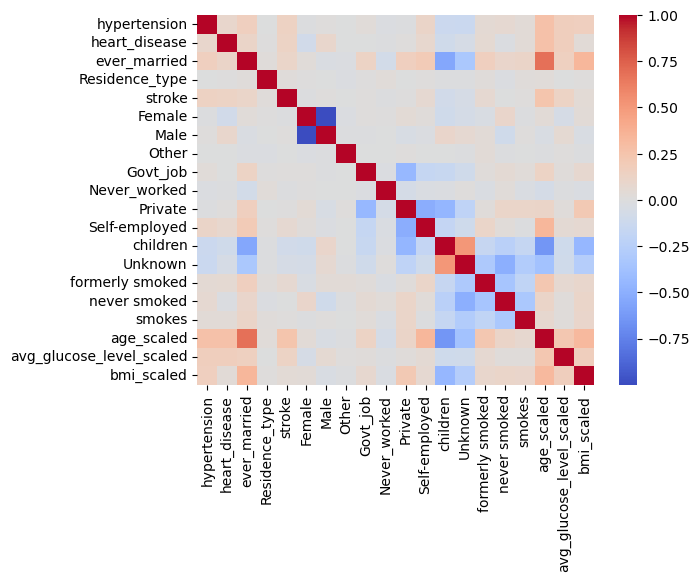

In [264]:
import seaborn as sns

sns.heatmap(final_train_df.corr(), cmap='coolwarm', fmt=".2f")

In [265]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [266]:
df_majority = final_train_df[final_train_df['stroke'] == 0]
df_minority = final_train_df[final_train_df['stroke'] == 1]

# Subsampling de la clase mayoritaria para igualar el número de muestras con la clase minoritaria
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combinar el submuestreo de la clase mayoritaria con la clase minoritaria
train_df_balanced = pd.concat([df_majority_downsampled, df_minority])

print(train_df_balanced['stroke'].value_counts())

False    199
True     199
Name: stroke, dtype: int64


In [267]:
df_majority = final_test_df[final_test_df['stroke'] == 0]
df_minority = final_test_df[final_test_df['stroke'] == 1]

# Subsampling de la clase mayoritaria para igualar el número de muestras con la clase minoritaria
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combinar el submuestreo de la clase mayoritaria con la clase minoritaria
final_test_df = pd.concat([df_majority_downsampled, df_minority])

print(final_test_df['stroke'].value_counts())

False    50
True     50
Name: stroke, dtype: int64


In [268]:
print(final_test_df['stroke'].value_counts())

False    50
True     50
Name: stroke, dtype: int64


<Axes: >

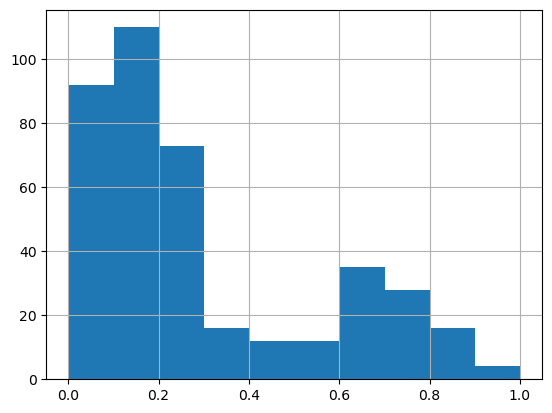

In [269]:
train_df_balanced.avg_glucose_level_scaled.hist()

In [270]:
final_df_train_Y = train_df_balanced.loc[:, 'stroke']
final_df_test_Y = final_test_df.loc[:, 'stroke']

In [271]:
final_df_train_X = train_df_balanced.drop('stroke', axis=1)
final_df_test_X = final_test_df.drop('stroke', axis=1)

In [272]:
final_df_test_X

,hypertension,heart_disease,ever_married,Residence_type,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,age_scaled,avg_glucose_level_scaled,bmi_scaled
804,False,False,True,True,True,False,False,False,False,True,False,False,False,False,True,False,0.609756,0.168775,0.138603
73,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,0.719512,0.589881,0.276060
900,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,0.158537,0.221402,0.095074
510,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,0.609756,0.033238,0.129439
675,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,True,0.926829,0.980934,0.201604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,0.902439,0.091589,0.186712
913,False,False,True,True,True,False,False,False,False,True,False,False,False,False,True,False,0.939024,0.231281,0.237113
942,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,0.817073,0.572431,0.203895
949,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,0.707317,0.173114,0.248568


In [273]:
final_df_test_Y

804    False
73     False
900    False
510    False
675    False
       ...  
903     True
913     True
942     True
949     True
978     True
Name: stroke, Length: 100, dtype: bool

In [274]:
hyperparameters_knn = {'n_neighbors': range(1, 100, 5)}

In [275]:
k_neigh = KNeighborsClassifier()
modelCV = GridSearchCV(k_neigh,
                       hyperparameters_knn,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


np.random.seed(42)

modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100, 5)},
             return_train_score=True, scoring='recall')

In [276]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
14,71,0.773846,0.090859,1
18,91,0.763718,0.086285,2
17,86,0.758718,0.080201,3
16,81,0.748718,0.082198,4
19,96,0.733590,0.080226,5
12,61,0.733590,0.090477,5
15,76,0.728718,0.095159,7
8,41,0.723462,0.028920,8
11,56,0.718462,0.071910,9
13,66,0.713718,0.076268,10


<ErrorbarContainer object of 3 artists>

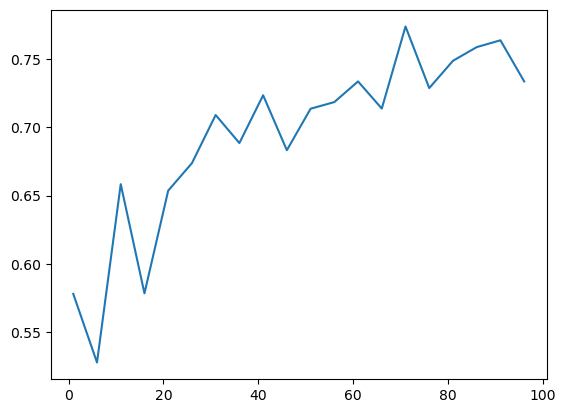

In [277]:
plt.errorbar(cv_results['param_n_neighbors'], cv_results['mean_test_score'])

Debido al rápido crecimietno del overfitting, tomamos el valor de vecinos en el punto donde la curva empieza a crecer desproporcionadamente

In [278]:
best_model_knn= KNeighborsClassifier(n_neighbors=35)

In [279]:
best_model_knn.fit(final_df_train_X, final_df_train_Y)

KNeighborsClassifier(n_neighbors=35)

In [280]:
knn_predict=best_model_knn.predict(final_df_test_X.values)

C:\Users\jatop\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [281]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=knn_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[29 21]
 [19 31]]


# Random Forest

In [282]:
final_df_train_X

,hypertension,heart_disease,ever_married,Residence_type,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,age_scaled,avg_glucose_level_scaled,bmi_scaled
2513,False,False,True,True,True,False,False,False,False,True,False,False,False,False,True,False,0.390244,0.118549,0.395189
2437,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,0.585366,0.213692,0.119129
2553,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,0.378049,0.223571,0.116838
3887,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,0.731707,0.827855,0.303551
335,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,0.158537,0.001246,0.147766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,False,True,True,True,False,True,False,False,False,True,False,False,False,False,False,True,0.865854,0.122980,0.212981
4031,False,True,True,True,False,True,False,False,False,False,True,False,False,True,False,False,0.975610,0.912196,0.231386
4042,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,0.841463,0.181285,0.143184
4059,False,False,True,True,False,True,False,False,False,True,False,False,False,True,False,False,0.951220,0.843089,0.212981


In [283]:
hyperparameters_rf = param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [2, 5, 10],
        'max_features' : [3, 4, 5, 7]
    }

In [284]:
rf = RandomForestClassifier()
modelCV = GridSearchCV(rf,
                       hyperparameters_rf,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [3, 4, 5, 7],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='recall')

In [285]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_n_estimators', 'param_max_features', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_estimators,param_max_features,param_max_depth,mean_test_score,std_test_score,rank_test_score
10,100,7,2,0.924615,0.047440,1
3,50,4,2,0.919744,0.050842,2
4,100,4,2,0.919744,0.048321,3
8,150,5,2,0.919744,0.048321,3
11,150,7,2,0.919487,0.048699,5
5,150,4,2,0.909744,0.055944,6
9,50,7,2,0.909487,0.060509,7
7,100,5,2,0.899744,0.052198,8
1,100,3,2,0.894744,0.057637,9
13,100,3,5,0.894744,0.057637,9


In [286]:
best_model_rf= RandomForestClassifier(random_state=42, n_estimators=100, max_features=4, max_depth=3)
best_model_rf.fit(final_df_train_X, final_df_train_Y)

RandomForestClassifier(max_depth=3, max_features=4, random_state=42)

In [287]:
rf_predict=best_model_rf.predict(final_df_test_X)

In [288]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=rf_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[33 17]
 [ 8 42]]


# Regresion logistica

In [289]:
hyperparameters_rl = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [290]:
rl = LogisticRegression()
modelCV = GridSearchCV(rl,
                       hyperparameters_rl,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


# En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias
modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='recall')

In [291]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
3,0.1,0.819231,0.057500,1
5,10,0.803718,0.068903,2
4,1,0.798974,0.052481,3
2,0.01,0.788846,0.072041,4
1,0.001,0.774359,0.118842,5
0,0.0001,0.690000,0.353765,6


<ErrorbarContainer object of 3 artists>

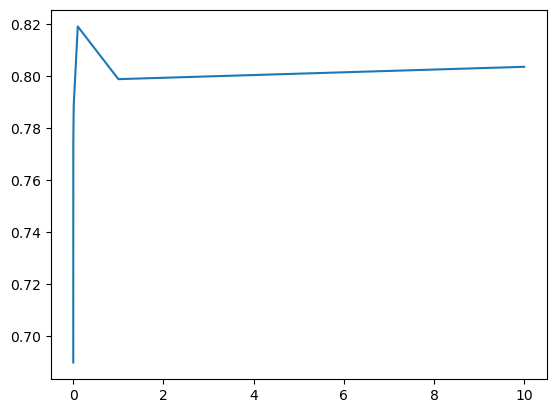

In [292]:
plt.errorbar(cv_results['param_C'], cv_results['mean_test_score'])

In [293]:
best_model_rl= modelCV.best_estimator_

In [294]:
rl_predict=best_model_rl.predict(final_df_test_X)

In [295]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=rl_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[39 11]
 [12 38]]


# SVC

In [296]:
c = [10**i for i in range(-4, 5, 1)]
hyperparameters_svc = {
    
    'C': c
}

In [297]:
svc = SVC(random_state = 42)
modelCV = GridSearchCV(
    svc,
    hyperparameters_svc,
    cv=5,
    scoring='recall',#recall acuerdate memo
    return_train_score=True,
    n_jobs=-1
    )



modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='recall')

In [298]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
3,0.1,0.934744,0.043504,1
4,1,0.798974,0.027463,2
0,0.0001,0.780000,0.390640,3
1,0.001,0.780000,0.390640,3
2,0.01,0.780000,0.390640,3
5,10,0.698718,0.064252,6
6,100,0.633462,0.072177,7
8,10000,0.597949,0.074275,8
7,1000,0.593205,0.060543,9


<ErrorbarContainer object of 3 artists>

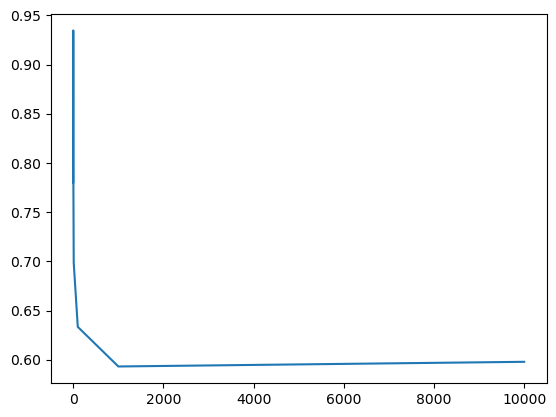

In [299]:
plt.errorbar(cv_results['param_C'], cv_results['mean_test_score'])


In [300]:
best_model_svc= SVC(random_state=42, C=100)
best_model_svc.fit(final_df_train_X, final_df_train_Y)

SVC(C=100, random_state=42)

In [301]:
svc_predict=best_model_svc.predict(final_df_test_X)

In [302]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=svc_predict)
print('La matriz de confusión del SVC es: \n{}'.format(matriz))

La matriz de confusión del SVC es: 
[[39 11]
 [14 36]]


In [303]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(final_df_test_Y, svc_predict)
recall = recall_score(final_df_test_Y, svc_predict)
f1 = f1_score(final_df_test_Y, svc_predict)
accuracy = accuracy_score(final_df_test_Y, svc_predict)
print('La precisión es del SVC: {}'.format(precision))
print('El recall es del SVC: {}'.format(recall))
print('El f1-score es del SVC: {}'.format(f1))
print('La accuracy es del SVC: {}'.format(accuracy))

precision = precision_score(final_df_test_Y, rf_predict)
recall = recall_score(final_df_test_Y, rf_predict)
f1 = f1_score(final_df_test_Y, rf_predict)
accuracy = accuracy_score(final_df_test_Y, rf_predict)
print('La precisión es del RF: {}'.format(precision))
print('El recall es del RF: {}'.format(recall))
print('El f1-score es del RF: {}'.format(f1))
print('La accuracy es del RF: {}'.format(accuracy))

precision = precision_score(final_df_test_Y, knn_predict)
recall = recall_score(final_df_test_Y, knn_predict)
f1 = f1_score(final_df_test_Y, knn_predict)
accuracy = accuracy_score(final_df_test_Y, knn_predict)
print('La precisión es del KNN: {}'.format(precision))
print('El recall es del KNN: {}'.format(recall))
print('El f1-score es del :KNN {}'.format(f1))
print('La accuracy es del KNN: {}'.format(accuracy))

precision = precision_score(final_df_test_Y, rl_predict)
recall = recall_score(final_df_test_Y, rl_predict)
f1 = f1_score(final_df_test_Y, rl_predict)
accuracy = accuracy_score(final_df_test_Y, rl_predict)
print('La precisión es del RL: {}'.format(precision))
print('El recall es del RL: {}'.format(recall))
print('El f1-score es del RL: {}'.format(f1))
print('La accuracy es del RL: {}'.format(accuracy))

La precisión es del SVC: 0.7659574468085106
El recall es del SVC: 0.72
El f1-score es del SVC: 0.7422680412371133
La accuracy es del SVC: 0.75
La precisión es del RF: 0.711864406779661
El recall es del RF: 0.84
El f1-score es del RF: 0.7706422018348624
La accuracy es del RF: 0.75
La precisión es del KNN: 0.5961538461538461
El recall es del KNN: 0.62
El f1-score es del :KNN 0.607843137254902
La accuracy es del KNN: 0.6
La precisión es del RL: 0.7755102040816326
El recall es del RL: 0.76
El f1-score es del RL: 0.7676767676767676
La accuracy es del RL: 0.77


In [304]:
from sklearn.metrics import auc, roc_curve
fpr_svc, tpr_svc, thresholds = roc_curve(final_df_test_Y, svc_predict, pos_label=1)
fpr_rf, tpr_rf, thresholds = roc_curve(final_df_test_Y, rf_predict, pos_label=1)
fpr_knn, tpr_knn, thresholds = roc_curve(final_df_test_Y, knn_predict, pos_label=1)
fpr_rl, tpr_rl, thresholds = roc_curve(final_df_test_Y, rl_predict, pos_label=1)

In [305]:
print('El área bajo la curva es del SVC: {}'.format(auc(fpr_svc, tpr_svc)))
print('El área bajo la curva es del RF: {}'.format(auc(fpr_rf, tpr_rf)))
print('El área bajo la curva es del KNN: {}'.format(auc(fpr_knn, tpr_knn)))
print('El área bajo la curva es del DT: {}'.format(auc(fpr_rl, tpr_rl)))

El área bajo la curva es del SVC: 0.75
El área bajo la curva es del RF: 0.7499999999999999
El área bajo la curva es del KNN: 0.6000000000000001
El área bajo la curva es del DT: 0.77


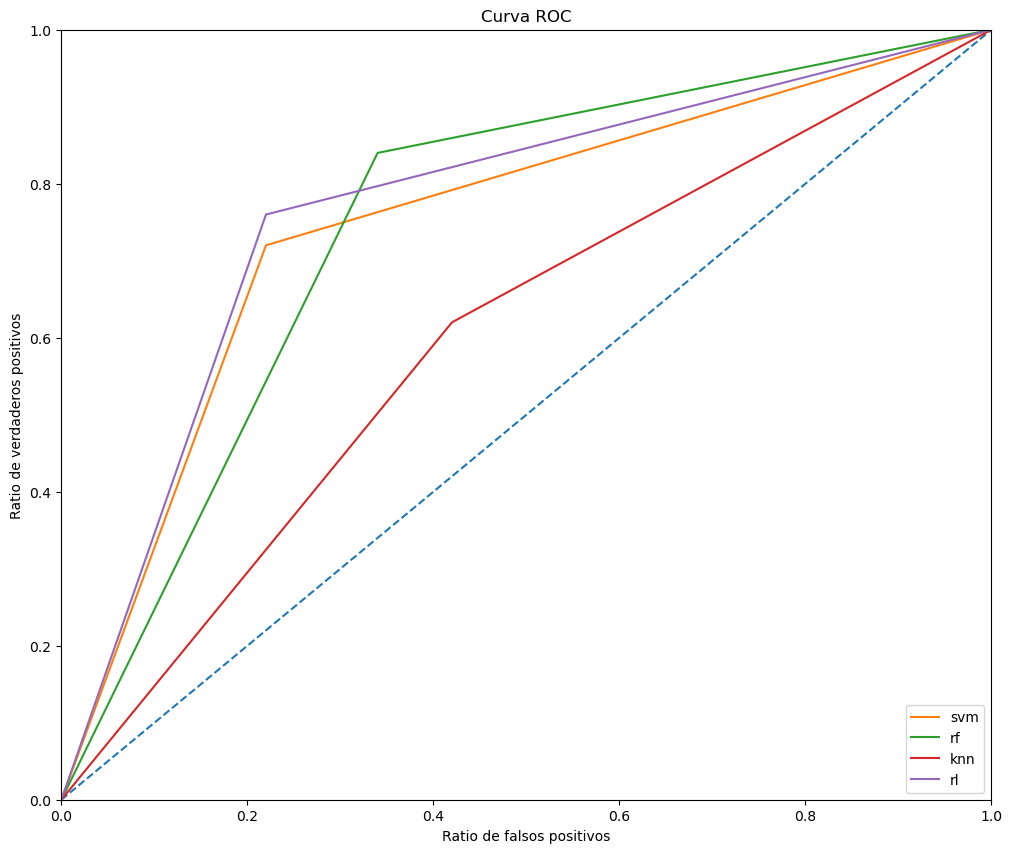

In [306]:
# Crear figura
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Pintar la diagonal
ax.plot([0,1],[0,1],ls='--')

# Pintar los ejes
ax.set_xlabel('Ratio de falsos positivos')
ax.set_ylabel('Ratio de verdaderos positivos')
ax.set_title('Curva ROC')

# Delimitar los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Pintar la curva
ax.plot(fpr_svc, tpr_svc, label='svm')
ax.plot(fpr_rf, tpr_rf, label='rf')
ax.plot(fpr_knn, tpr_knn, label='knn')
ax.plot(fpr_rl, tpr_rl, label='rl')

# Mostrar plot
ax.legend(loc='lower right')
plt.show()